# Data Analysis

## Objective

### Background
Welcome, intrepid data detectives! In this assignment, you'll be diving into the world of Data Hackers Inc., a notorious (and completely fictitious) organization that specializes in uncovering secrets buried within mountains of data.

Rumor has it that Data Hackers Inc. has recently come into possession of a vast dataset containing information from a popular store credit card program. Through a series of clever phishing schemes and security loopholes, Data Hackers Inc. managed to access not only the store's internal customer information but also data from several other sources, merging them into one comprehensive treasure trove. This dataset includes personal information, credit card details, and even customer shopping habits, all mixed together from different breaches.

These nuggets are not just any data points but critical pieces of information that could reveal secrets, target high-value individuals, and even expose weaknesses in personal security. Your mission, should you choose to accept it, is to dig deep into this dataset, identify these nuggets, and understand their implications.

 
### Your Mission: Find the Nuggets
As a member of Data Hackers Inc., your job is to explore the provided dataset and uncover as many valuable nuggets as possible. A "nugget" refers to a piece of information that is particularly insightful or useful, either for understanding patterns, revealing vulnerabilities, or targeting specific individuals. All the work can be done in Excel, though you're more than welcome to use a more advanced data tool (no need to share the code). Useful Excel commands could be sumif, sumifs, filters, pivot tables and automatic formatting. 

**Identify Key Data Points**: Your first task is to analyze the dataset and pinpoint the key data points that stand out. These might include anomalies, patterns, or sensitive information that could be exploited if in the wrong hands.

**Analyze Relationships**: Look for connections between different data columns. For example, are there inconsistencies between the stated location and the IP-derived location? Do certain individuals have high loyalty points and unusual transaction patterns? Use your analytical skills to uncover these relationships.

**Highlight High-Value Targets**: Use the data to identify individuals who might be considered high-value targets. This could be due to their occupation, level of seniority, or the amount of personal information available. Think about what makes someone a high-value target and use the data to back up your conclusions.

**Report Your Findings**: Document your findings in a clear and structured report. You can use any visual aids that help illustrate your discoveries. Remember, the quality of your report will be judged not only on what you find but also on how well you communicate your findings.


### Hints and Tips
**Look for Patterns**: Data often tells a story. Check for patterns in login times, purchase history, or travel frequency. These can reveal a lot about someone's habits and routines.

**Compare Locations**: Use the state and ip_derived_state columns to find discrepancies. This might suggest VPN use, identity inconsistencies, or someone trying to hide their location.

**Use Demographic Information**: Age, marital status, and income can all provide context. Older individuals might be more vulnerable to certain scams, while high-income individuals might be attractive targets for different reasons.

**Don't Overlook the Simple Stuff**: Even basic information like email domains can provide insights. Personal vs. work email usage could suggest how cautious someone is with their information. Also, just like us, hackers also face the challenges of dealing with dirty data. The data they stole might not be perfectly clean or reliable. Oh and no, when you steal data, you typically don't get the data dictionary that comes with it!

**Think Like a Hacker**: If you were trying to exploit this data, what would you look for? Use that mindset to guide your exploration. Do also think about what other companies could do with the information you now have, such as unscrupulous marketing companies whose large goal is to better target customer or identify high value/high growth customers.

**Leverage the Merged Data**: You’ve been handed a dataset that’s already been joined together by your hacker buddies. However, the original sources of the columns are unknown. This means that identifying patterns in one column that correlate with similar patterns in another column is particularly valuable. Each of your hacker buddies might have only had access to a single column, so discovering relationships between different columns is a gold nugget in itself. These multi-column connections not only reveal valuable insights but also empower your hacker buddies to act independently. By identifying these relationships, they can take action and contribute to the company's earnings without needing to find or merge related data themselves. Win-win!
 

Good luck, data detectives! Remember, the more nuggets you find, the more you reveal about the hidden stories within the data. 

## Import Libraries 

In [30]:
!pip install pandas openpyxl seaborn

In [31]:
import pandas as pd
import seaborn as sns
from collections import defaultdict
from datetime import datetime

## Load Data

In [32]:
data_path = "./Data/Merged_Borrowed_Customer_records.xlsx"

data = pd.read_excel(data_path)

In [33]:
data.head(5)

,customer_id,first_name,last_name,email,phone_number,ssn,address,state,dob,Unnamed: 9,...,12 month purchace history,loyalty_points,last_login_ip,subscription_status,newsletter_opt_in,travel_freq_per_month,email_domain,age,Large_state_specific_grants,ip_derived_state
0,2617,Stephanie,Meyer,Stephanie.Meyer@schultz-williams.com,001-422-988-1331x314,709-27-6855,054 Brown Avenue Apt. 091,Arkansas,1996-05-12,28,...,88941,3832,49.105.154.161,Pending,False,0,schultz-williams.com,28,Not Eligible,Arkansas
1,9332,William,Carney,William.Carney@hotmail.com,001-554-242-8523x70724,611-74-7207,8069 Paul Mission,Oregon,2004-10-17,20,...,33217,4471,149.22.237.180,Active,False,0,hotmail.com,20,Not Eligible,Oregon
2,2535,Zachary,Thompson,Zachary.Thompson@goodwin.com,+1-757-418-1528x9056,803-59-2739,"PSC 8133, Box 8354",North Carolina,1974-11-17,50,...,51082,8644,27.229.49.68,Active,False,0,goodwin.com,50,Not Eligible,North Carolina
3,1402,Alexandria,Johnson,Alexandria.Johnson@yahoo.com,9920281864,233-19-7129,0075 Aguilar Springs Apt. 194,Idaho,1965-07-09,59,...,29336,9527,54.211.178.240,Pending,True,2,yahoo.com,59,Not Eligible,Idaho
4,7573,Sarah,Green,Sarah.Green@kelly.info,364.345.1478,785-16-3136,8355 Joseph Canyon Suite 567,Alaska,1991-05-24,33,...,71140,6377,149.22.237.180,Pending,True,6,kelly.info,33,Not Eligible,Alaska


### Let's take a look at the count of customer id occurrences

In [34]:
#Extract the customer ID column
cust_id = list(data["customer_id"])

#Instantiate a defaultdict to count occurrences of customer ids
occurrences = defaultdict(int)

#Loop through the set of ids and append them to the dictionary. If they already exist, add one to the id value. 
for id in cust_id:
    if id in occurrences:
        occurrences[id]+=1
    else:
        occurrences[id]=1


print(max(occurrences.values()))

3


### It appears that 3 occurrences is the max, let's make a histogram to get a visual

<Axes: ylabel='Count'>

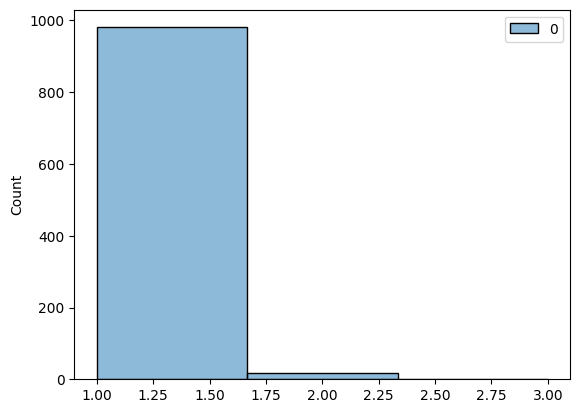

In [35]:
#Lets plot this first
sns.histplot(occurrences.values(), bins=3)

### So, there are very few customer ids that were used more than once. I want to target those.

In [36]:
multiple_occurrences = {}

for key, value in occurrences.items():
    if value > 1:
        multiple_occurrences[key] = value 

len(multiple_occurrences)

19

### There are only 19 customers with multiple entries. I want to look at their data.

In [37]:
drop_indices = []

#Loop through the df and extract the indices that are not the customers of interest
for i in range(len(data)):
    if data.iloc[i]["customer_id"] not in multiple_occurrences:
        drop_indices.append(i)

print(len(data)-len(drop_indices))

multiples = data.copy()
multiples.drop(drop_indices, axis = 0, inplace=True)
len(multiples)

39


39

### Perfect, we now have a dataframe that contains all repeat customers. Lets analyze this data.

In [38]:
# I want to look at this data in a format that is a bit easier to understand. I'm going to write it out to an excel file.
multiples["credit_card_number"].astype(str)
multiples.to_csv("./Data/multiples.csv")
multiples.to_excel("./Data/multiples.xlsx")

### After looking at the excel, it seems like there is some aliasing going on in this data set. Let's see which columns have customers with aliasing.

In [54]:
aliased_cols = []

for col in multiples.columns:
    if len(multiples[col].unique())>len(multiple_occurrences):
        aliased_cols.append(col)

aliased_cols

['last_name', 'email', 'address', 'credit_card_expiry']

### This is a great hint, it tells me that these are the same people that used aliases or have been victims of identity fraud. I am confident in this conclusion because the critical identifiers like SSN, credit card number, DOB, and IP are all the same for each customer. That said, the aliasing I've discovered is making me question the use of customer ID as the primary key for my analysis. Perhaps social security number would be better. This is guaranteed to be unique for each customer.

In [40]:
#Extract the ssn column
ssn = list(data["ssn"])

#Instantiate a defaultdict to count occurrences of ssn
ssn_occurrences = defaultdict(int)

#Loop through the set of ids and append them to the dictionary. If they already exist, add one to the id value. 
for id in ssn:
    if id in ssn_occurrences:
        ssn_occurrences[id]+=1
    else:
        ssn_occurrences[id]=1


print(max(ssn_occurrences.values()))

4


### Hmmmmm, interesting. So there appears to be more duplicate SSN's than customer IDs. Time for a histogram.

<Axes: ylabel='Count'>

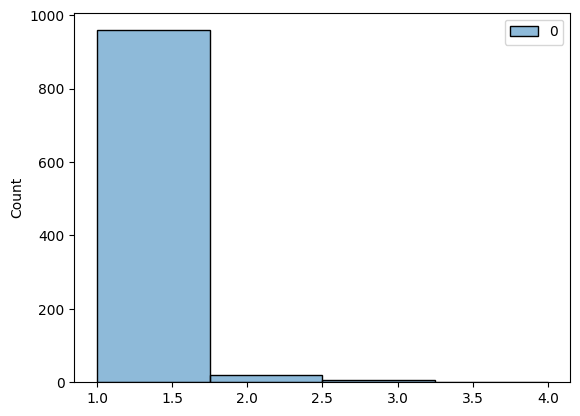

In [41]:
#Lets plot this first
sns.histplot(ssn_occurrences.values(), bins=max(ssn_occurrences.values()))

In [42]:
multiple_ssn_occurrences = {}

for key, value in ssn_occurrences.items():
    if value > 1:
        multiple_ssn_occurrences[key] = value 

len(multiple_ssn_occurrences)

27

In [43]:
ssn_drop_indices = []

#Loop through the df and extract the indices that are not the customers of interest
for i in range(len(data)):
    if data.iloc[i]["ssn"] not in multiple_ssn_occurrences:
        ssn_drop_indices.append(i)

print(len(data)-len(ssn_drop_indices))

multiple_ssn = data.copy()
multiple_ssn.drop(ssn_drop_indices, axis = 0, inplace=True)
len(multiple_ssn)

61


61

In [44]:
# I want to look at this data in a format that is a bit easier to understand. I'm going to write it out to an excel file.
multiple_ssn.to_csv("./Data/multiple_ssn.csv")
multiple_ssn.to_excel("./Data/multiple_ssn.xlsx")

In [45]:
#Identify columns with aliasing or fraudulent activity
aliased_ssn_cols = []

for col in multiple_ssn.columns:
    if len(multiple_ssn[col].unique())>len(multiple_ssn_occurrences):
        aliased_ssn_cols.append(col)

aliased_ssn_cols

['customer_id',
 'first_name',
 'last_name',
 'email',
 'phone_number',
 'address',
 'dob',
 'Unnamed: 9',
 'Occupation',
 'company',
 'credit_card_number',
 'credit_card_expiry',
 'credit_card_security_code',
 'annual_income',
 '12 month purchace history',
 'loyalty_points',
 'last_login_ip',
 'age',
 'ip_derived_state']

### Okay, I am glad I did this. SSN is a better metric for identifying repeat customers\customers with possibly fraudulent data than customer ID. Based on the excel file, there appear to be unrelated customers that share SSNs in this data set. These customers are potentially already victims of identity fraud. These will be the primary targets to screen for High Value Target status.

### To identify high value targets, I want to filter by Annual Income, 12 month purchase history, travel frequency, credit card expiration, and subscription status. I want people with the highest purchase history to income ratio with active subscriptions, frequent travel, and non-expired credit cards. These people are the least likely to identify credit card fraud, and they are frequent travelers, so the credit card agency won't be tipped off if they login/purchase from another IP (me).

In [46]:
#Compute spend to income ratio and add it as a column
multiple_ssn["spend_to_income_ratio"] = multiple_ssn["12 month purchace history"]/multiple_ssn["annual_income"]*100
multiple_ssn["spend_to_income_ratio"]

39      4.197971
45      2.528298
52     10.446575
58     32.479337
81     28.527612
         ...    
957    14.271947
961    31.198604
970    12.631778
982    71.886706
994    45.291875
Name: spend_to_income_ratio, Length: 61, dtype: float64

In [47]:
#filter multiple_ssn by credit card expiration and subscription status
primary_hvts = multiple_ssn[(multiple_ssn["subscription_status"]=="Active") & (multiple_ssn["credit_card_expiry"]>datetime.today()) & (multiple_ssn["travel_freq_per_month"]>=5)]
primary_hvts.sort_values(["travel_freq_per_month", "spend_to_income_ratio"], ascending=False)

,customer_id,first_name,last_name,email,phone_number,ssn,address,state,dob,Unnamed: 9,...,loyalty_points,last_login_ip,subscription_status,newsletter_opt_in,travel_freq_per_month,email_domain,age,Large_state_specific_grants,ip_derived_state,spend_to_income_ratio
674,1815,Eric,Davis,Eric.Davis@williams-burton.biz,(365)634-3934x662,455-39-5032,740 Gonzalez Station,Indiana,1965-04-27,59,...,2159,134.171.57.199,Active,True,24,williams-burton.biz,59,Not Eligible,Indiana,71.886706
982,1815,Eric,Holmes,Eric.Holmes@williams-burton.biz,(365)634-3934x662,455-39-5032,416 Rebekah Junction Suite 972,Minnesota,1965-04-27,59,...,2159,134.171.57.199,Active,True,22,williams-burton.biz,59,Not Eligible,Minnesota,71.886706
224,7931,Paula,Williams,Paula.Williams@gmail.com,045-895-4113,243-63-5844,3472 Mcintosh Orchard Apt. 117,Maine,2001-09-28,23,...,1475,193.113.177.227,Active,True,13,gmail.com,23,Not Eligible,Maine,45.291875
625,2620,Mark,Davis,Mark.Davis@gmail.com,(651)062-4029,722-65-2813,21137 Trevino Flats,Georgia,1992-12-14,32,...,251,188.158.220.61,Active,True,13,gmail.com,32,Not Eligible,Georgia,27.252325
994,7931,Paula,Williams,Paula.Williams@gmail.com,045-895-4113,243-63-5844,454 Jones Prairie,Maine,2001-09-28,23,...,1475,193.113.177.227,Active,True,11,gmail.com,23,Not Eligible,Maine,45.291875
347,5173,Carl,Austin,Carl.Austin@nguyen.com,001-364-375-5444x9263,878-70-5975,77829 Chelsea Parkway Apt. 159,New Mexico,1973-10-03,51,...,4880,203.198.93.41,Active,True,5,nguyen.com,51,Not Eligible,New Mexico,24.785307


In [48]:
primary_hvts.to_csv("./Data/primary_hvts.csv")

### The primary High Value Targets have been identified. These people have multiple entries for social security numbers, which is a very small subset of the dataset. I now want to exclude the folks used in this analysis from the global dataset, then repeat the filtering process to identify secondary HVTs.

In [49]:
ssn_drop_indices = []

#Loop through the df and extract the indices that are not the customers of interest
for i in range(len(data)):
    if data.iloc[i]["ssn"] in multiple_ssn_occurrences:
        ssn_drop_indices.append(i)

print(len(data)-len(ssn_drop_indices))

single_ssn = data.copy()
single_ssn.drop(ssn_drop_indices, axis = 0, inplace=True)
len(single_ssn)

959


959

In [50]:
#Compute spend to income ratio and add it as a column
single_ssn["spend_to_income_ratio"] = single_ssn["12 month purchace history"]/single_ssn["annual_income"]*100
single_ssn["spend_to_income_ratio"]

0       58.469195
1       28.393219
2       17.377856
3       16.257495
4       41.537531
          ...    
1015    13.505279
1016    70.476421
1017    95.551979
1018     4.635506
1019    23.099750
Name: spend_to_income_ratio, Length: 959, dtype: float64

In [51]:
#filter multiple_ssn by credit card expiration and subscription status
secondary_hvts = single_ssn[(single_ssn["subscription_status"]=="Active") & (single_ssn["credit_card_expiry"]>datetime.today()) & (single_ssn["travel_freq_per_month"]>=5) & (single_ssn["spend_to_income_ratio"]>=35)]
secondary_hvts.sort_values(["travel_freq_per_month", "spend_to_income_ratio"], ascending=False)

,customer_id,first_name,last_name,email,phone_number,ssn,address,state,dob,Unnamed: 9,...,loyalty_points,last_login_ip,subscription_status,newsletter_opt_in,travel_freq_per_month,email_domain,age,Large_state_specific_grants,ip_derived_state,spend_to_income_ratio
232,4060,James,Lopez,James.Lopez@mueller.com,596.627.9318,700-28-7329,79063 John Mission Apt. 568,Virginia,1966-09-29,58,...,3947,190.127.85.240,Active,False,25,mueller.com,58,Not Eligible,Virginia,85.496809
56,5902,Robert,Roberts,Robert.Roberts@andrews-rocha.org,146-222-9244x564,863-81-0428,373 Brian Grove,Indiana,1951-08-19,73,...,149,122.139.23.133,Active,False,25,andrews-rocha.org,73,Not Eligible,Indiana,52.121696
351,4828,Amanda,Parker,Amanda.Parker@kennedy.net,653.482.0085x22150,155-84-9566,100 Holmes Cliffs,Washington,1997-12-16,27,...,2087,39.97.182.255,Active,False,25,kennedy.net,27,Not Eligible,Washington,52.080347
67,2858,Joseph,Suarez,Joseph.Suarez@garrett.com,378.508.2400,765-05-9614,69060 Thomas Walk,Maryland,1976-06-22,48,...,5262,60.55.210.47,Active,False,25,garrett.com,48,Not Eligible,Maryland,39.016327
484,1250,Daniel,Walsh,Daniel.Walsh@hotmail.com,(442)477-7659x5582,332-16-4913,354 Jordan Manor Suite 746,Vermont,1937-01-17,87,...,8007,192.210.182.151,Active,True,22,hotmail.com,87,Not Eligible,Vermont,79.159375
255,3098,Gregory,Quinn,Gregory.Quinn@montgomery.com,001-275-146-7885x856,684-44-0627,7995 Saunders Lake Suite 607,Ohio,1952-05-14,72,...,7083,3.172.175.213,Active,True,22,montgomery.com,72,Not Eligible,Ohio,52.924442
318,8439,Stephanie,Meyer,Stephanie.Meyer@yahoo.com,621160838,828-89-2919,6534 Debbie Ville Apt. 067,West Virginia,1989-10-22,35,...,9221,26.143.127.120,Active,False,20,yahoo.com,35,Not Eligible,West Virginia,63.119735
428,6871,Melissa,Atkins,Melissa.Atkins@williams.com,+1-123-608-4233x436,432-41-1377,00700 Johnson Ville Suite 601,New Mexico,1982-10-02,42,...,9929,217.42.112.251,Active,True,20,williams.com,42,Not Eligible,New Mexico,37.494638
524,7468,Erik,Pham,Erik.Pham@yahoo.com,(984)829-3100,469-75-5046,7364 Brandon Meadows,Pennsylvania,1935-12-28,89,...,1821,192.210.182.151,Active,False,18,yahoo.com,89,Not Eligible,Pennsylvania,40.876617
558,9520,Nicholas,Lambert,Nicholas.Lambert@jimenez.com,(092)442-2697,799-97-6606,489 Richard Canyon Apt. 467,South Dakota,1994-05-30,30,...,8295,88.177.217.137,Active,False,13,jimenez.com,30,Not Eligible,Texas,51.617368


In [52]:
hvts = pd.concat([primary_hvts,secondary_hvts])

In [53]:
secondary_hvts.to_csv("./Data/secondary_hvts.csv")
hvts.to_csv("./Data/hvts.csv")